![Gerbang_XOR.jpg](Gerbang_XOR.jpg)

In [1]:

#Listing 3.18. Prediksi XOR 
#------------------------------------------------------------------------------------

import tensorflow as tf
import numpy as np

tf.compat.v1.disable_eager_execution()

#------------------------------------------------------------------------------------
# Buat placeholder untuk label input dan output pelatihan
#------------------------------------------------------------------------------------

x_ = tf.compat.v1.placeholder(tf.float32, shape=[4,2], name="x-input")
y_ = tf.compat.v1.placeholder(tf.float32, shape=[4,1], name="y-output")

#------------------------------------------------------------------------------------
# Tentukan bobot masing-masing ke lapisan tersembunyi dan keluaran.
#------------------------------------------------------------------------------------

w1 = tf.Variable(tf.random.uniform([2,2], -1, 1), name="Weights1")
w2 = tf.Variable(tf.random.uniform([2,1], -1, 1), name="Weights2")

#------------------------------------------------------------------------------------
# Tentukan bias masing-masing lapisan tersembunyi dan keluaran
#------------------------------------------------------------------------------------

b1 = tf.Variable(tf.zeros([2]), name="Bias1")
b2 = tf.Variable(tf.zeros([1]), name="Bias2")

#------------------------------------------------------------------------------------
# Tentukan hasil akhir melalui operan maju
#------------------------------------------------------------------------------------

z2 = tf.sigmoid(tf.matmul(x_, w1) + b1)
pred = tf.sigmoid(tf.matmul(z2,w2) + b2)

#------------------------------------------------------------------------------------
# Tentukan fungsi Biaya Cross-entropy / Log-loss berdasarkan label
# output y dan probabilitas yang diprediksi oleh forward pass
#------------------------------------------------------------------------------------

cost = tf.reduce_mean(( (y_ * tf.math.log(pred)) +
((1 - y_) * tf.math.log(1.0 - pred)) ) * -1)
learning_rate = 0.01
train_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)
#train_step = tf.keras.optimizers.SGD(learning_rate=learning_rate)


#------------------------------------------------------------------------------------
# Sekarang setelah dimiliki semua yang dibutuhkan, dimulai pelatihan
#------------------------------------------------------------------------------------

# Pasangan data latih

XOR_X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

XOR_Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

#------------------------------------------------------------------------------------
# Inisialisasi variabel
#------------------------------------------------------------------------------------
init = tf.compat.v1.global_variables_initializer()

sess = tf.compat.v1.Session()

writer = tf.compat.v1.summary.FileWriter("./Downloads/XOR_logs", sess.graph)

sess.run(init)
for i in range(10):
    sess.run(train_step, feed_dict={x_: XOR_X, y_: XOR_Y})

Hasil_prediksi = sess.run(pred, feed_dict={x_: XOR_X, y_: XOR_Y})

#------------------------------------------------------------------------------------
print('Final Prediction', Hasil_prediksi)
#------------------------------------------------------------------------------------



Final Prediction [[0.3992512]
 [0.4418983]
 [0.4125384]
 [0.4523002]]


In [5]:
XOR_X.shape

(4, 2)

In [6]:
XOR_Y.shape

(4, 1)

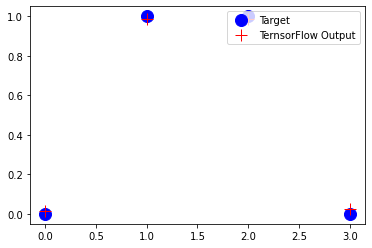

In [3]:
import matplotlib.pyplot as plt
plt.plot(XOR_Y, 'bo', label='Target', linewidth=2, markersize=12)
plt.plot(Hasil_prediksi, 'r+', label='TernsorFlow Output', linewidth=2, markersize=12)
plt.legend(loc='upper right')
plt.show()


In [4]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse1  = mean_squared_error(XOR_Y, Hasil_prediksi)
rmse1 = sqrt(mean_squared_error(XOR_Y, Hasil_prediksi))
print('MSE =',mse1)
print('RMSE =',rmse1)

MSE = 0.00034505942448359583
RMSE = 0.018575775205454975
